**Convert a linear classifier into a multi-class classifier, including multinomial logistic regression or softmax regression, One vs. All (One-vs-Rest) and One vs. One.**

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
from matplotlib.colors import ListedColormap

In [2]:
plot_colors = ["red", "yellow", "blue"]
plot_step = 0.02

def decision_boundary(X, y, model, iris, two=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    if two:
        for i, color in zip(np.unique(y), plot_colors):
            idx = np.where(y == i)
            plt.scatter(X[idx, 0], X[idx, 1], label=y, color=color, s=15)
        plt.show()
    else:
        set_ = {0, 1, 2}
        for i, color in zip(range(3), plot_colors):
            idx = np.where(y == i)
            if np.any(idx):
                set_.remove(i)
                plt.scatter(X[idx, 0], X[idx, 1], label=y, color=color, edgecolor='black', s=15)
        
        for i in set_:
            idx = np.where(iris.target == i)
            plt.scatter(X[idx, 0], X[idx, 1], marker='x', color='black')
        
        plt.show()

In [3]:
# Function will plot the probability of belonging to each class; each column is the probability of belonging to a class and the row number is the sample number.
def plot_probability_array(X, probability_array):
    plot_array = np.zeros((X.shape[0], 30))
    col_start = 0
    ones = np.ones((X.shape[0], 30))
    for class_, col_end in enumerate([10, 20, 30]):
        plot_array[:, col_start: col_end] = np.repeat(probability_array[:, class_].reshape(-1, 1), 10, axis=1)
        col_start = col_end
    plt.imshow(plot_array)
    plt.xticks([])
    plt.ylabel("Samples")
    plt.xlabel("Probability of 3 classes")
    plt.colorbar()
    plt.show()

In [4]:
# Use the Iris dataset
pair=[1, 3]
iris = datasets.load_iris()
X = iris.data[:, pair]
y = iris.target
np.unique(y)

array([0, 1, 2])

Text(0, 0.5, 'petal width')

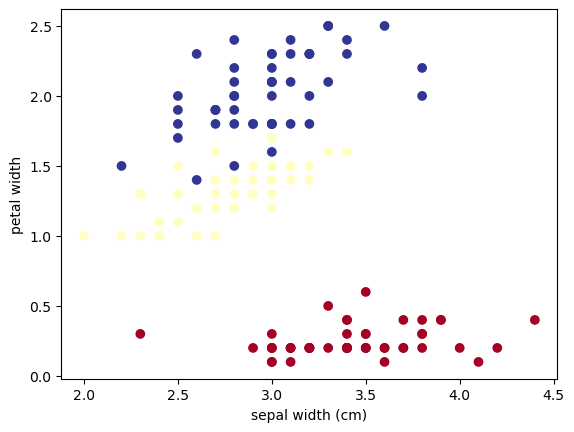

In [5]:
# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel("sepal width (cm)")
plt.ylabel("petal width")

## SoftMax Regression (Multinomial Logistic Regression)

In [6]:
# Train
lr = LogisticRegression(random_state=0).fit(X, y)

In [7]:
# Predict
probability =  lr.predict_proba(X)

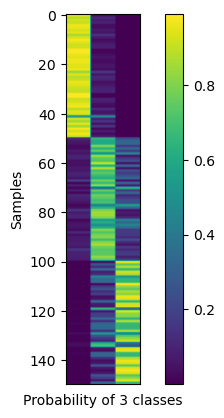

In [8]:
# Plot the probability
plot_probability_array(X, probability)

In [9]:
# Output of first sample
probability[0, :]

array([9.57671606e-01, 4.22321095e-02, 9.62845517e-05])

In [10]:
# Sums to one
probability[0, :].sum()

0.9999999999999999

In [11]:
# Argmax function
np.argmax(probability[0, :])

0

In [12]:
# Argmax function for each sample
softmax_prediction = np.argmax(probability, axis=1)
softmax_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [13]:
# sklearn does this under the hood by comparing it to the output of the method  predict 
yhat =lr.predict(X)
accuracy_score(yhat, softmax_prediction)

1.0

**Can't use Softmax Regression for SVMs**

## Support Vector Machine (SVM)

In [14]:
# Train
model = SVC(kernel='linear', gamma=.5, probability=True)
model.fit(X, y)

SVC(gamma=0.5, kernel='linear', probability=True)

In [15]:
# Predict
yhat = model.predict(X)
accuracy_score(y, yhat)

0.96

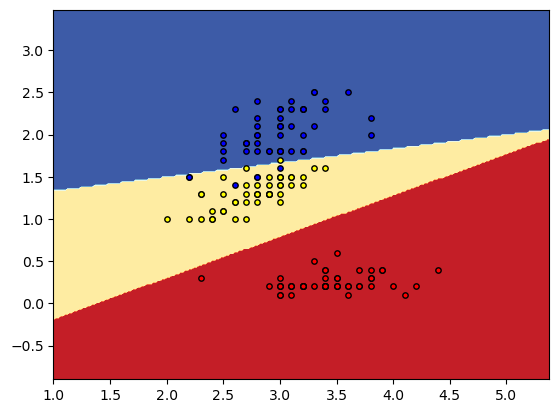

In [16]:
# Call the function to plot
decision_boundary(X, y, model, iris)

**Two methods of Multi-class Classification that can be applied to SVM**

## One-vs-All (One-vs-Rest)

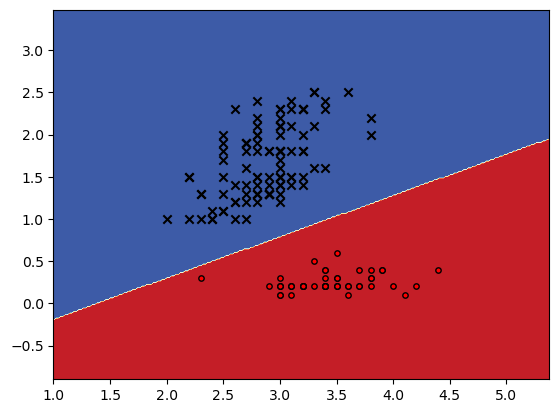

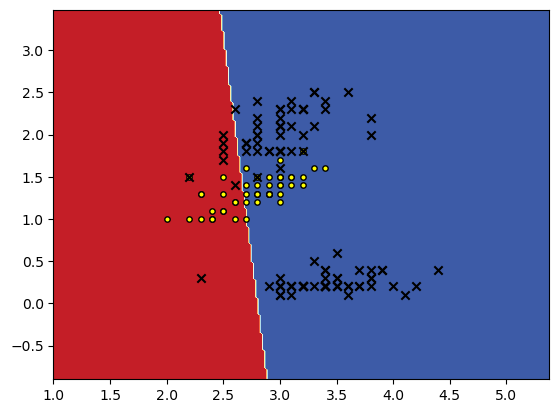

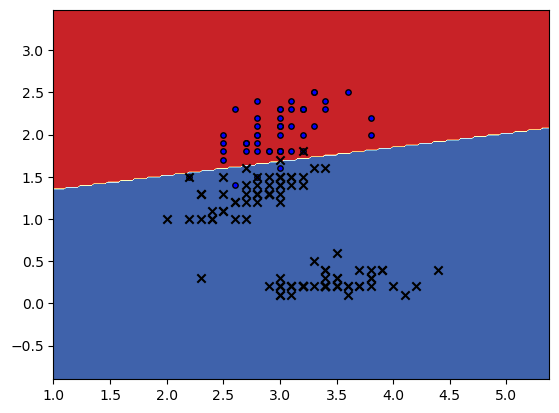

In [17]:
# Dummy class
dummy_class=y.max()+1

# List used for classifiers 
my_models=[]

# Iterate through each class
for class_ in np.unique(y):
    
    # Select the index of the class
    select = (y==class_)
    temp_y = np.zeros(y.shape)
    
    # Class trying to be classify 
    temp_y[y==class_] = class_
    
    # Set other samples to a dummy class 
    temp_y[y!=class_] = dummy_class
    
    # Train model and add to list 
    model = SVC(kernel='linear', gamma=.5, probability=True)    
    my_models.append(model.fit(X, temp_y))
    
    # Plot decision boundary 
    decision_boundary(X, temp_y, model, iris)

In [18]:
# For each sample, calculate the probability of belonging to each class, not including the dummy class.
probability_array = np.zeros((X.shape[0], 3))

for j,model in enumerate(my_models):
    real_class = np.where(np.array(model.classes_)!=3)[0]
    probability_array[:, j] = model.predict_proba(X)[:, real_class][:, 0]

In [19]:
# Probability of belonging to each class for the first sample
probability_array[0, :]

array([9.91142005e-01, 1.17836443e-01, 7.61818572e-12])

In [20]:
# As each is the probability of belonging to the actual class and not the dummy class, it does not sum to one. 
probability_array[0, :].sum()

1.1089784481846452

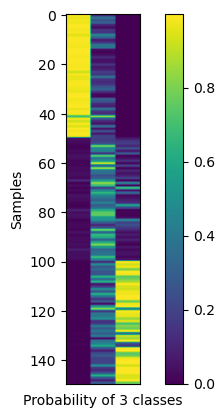

In [21]:
# Plot the probability of belonging to the class
plot_probability_array(X, probability_array)

In [22]:
# Argmax function
one_vs_all = np.argmax(probability_array, axis=1)
one_vs_all

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [23]:
# Accuracy
accuracy_score(y, one_vs_all)

0.9466666666666667

In [24]:
# The accuracy is less than the one obtained by sklearn, and this is because for SVM, sklearn uses one vs one; let's verify it by comparing the outputs. 
accuracy_score(one_vs_all, yhat)

0.9733333333333334

## One-vs-One

In [25]:
# List each class
classes_=set(np.unique(y))
classes_

{0, 1, 2}

In [26]:
# Determine the number of classifiers
K=len(classes_)
K*(K-1)/2

3.0

class 0 vs class 1 


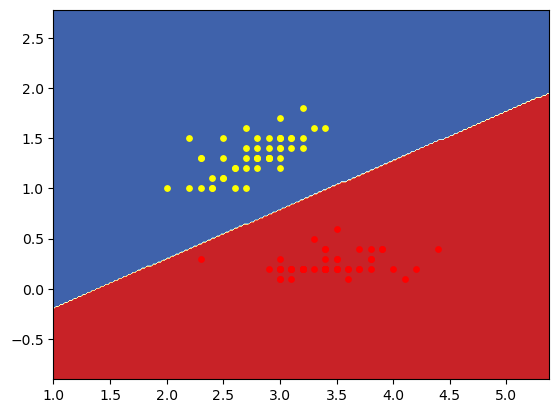

class 0 vs class 2 


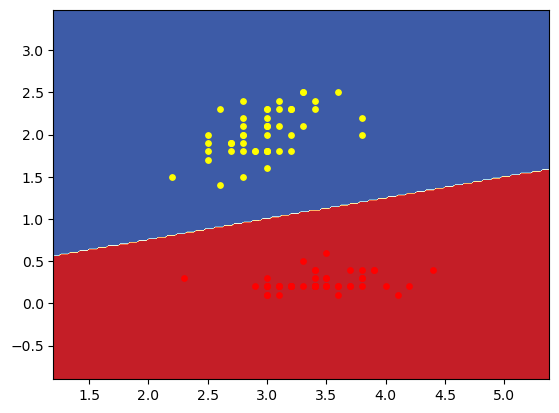

class 1 vs class 2 


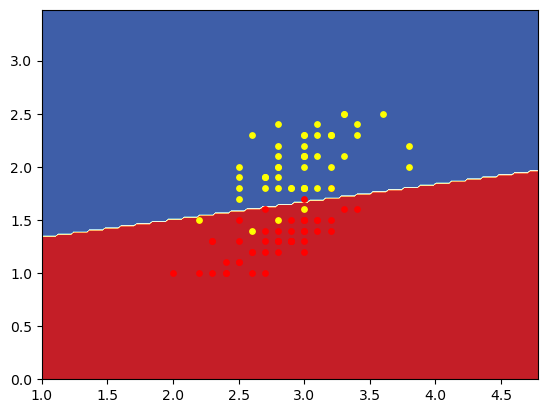

In [27]:
# Train a two-class classifier on each pair of classes
# Plot the different training points for each of the two classes 
pairs=[]
left_overs=classes_.copy()

# List used for classifiers 
my_models=[]

# Iterate through each class
for class_ in classes_:
    
    # Remove class that has been seen before 
    left_overs.remove(class_)
    
    # The second class in the pair
    for second_class in left_overs:
        pairs.append(str(class_) + ' and ' + str(second_class))
        print("class {} vs class {} ".format(class_, second_class) )
        temp_y = np.zeros(y.shape)
        
        # Find classes in pair 
        select = np.logical_or(y==class_, y==second_class)
        
        # Train
        model = SVC(kernel='linear', gamma=.5, probability=True)  
        model.fit(X[select, :], y[select])
        my_models.append(model)
        
        # Plot decision boundary for each pair and corresponding Training samples
        decision_boundary(X[select, :], y[select], model, iris, two=True)

In [28]:
pairs

['0 and 1', '0 and 2', '1 and 2']

In [29]:
# Plot the distribution of text length
pairs
majority_vote_array = np.zeros((X.shape[0], 3))
majority_vote_dict = {}
for j, (model, pair) in enumerate(zip(my_models, pairs)):
    majority_vote_dict[pair] = model.predict(X)
    majority_vote_array[:, j] = model.predict(X)

In [30]:
# Table
pd.DataFrame(majority_vote_dict).head(10)

,0 and 1,0 and 2,1 and 2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [31]:
# To perform classification on a sample, perform a majority vote, that is, select the class with the most predictions
# Repeat the process for each sample 
one_vs_one = np.array([np.bincount(sample.astype(int)).argmax() for sample in majority_vote_array]) 
one_vs_one

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [32]:
# Accuracy
accuracy_score(y, one_vs_one)

0.96

In [33]:
# Comparison with sklearn
accuracy_score(yhat, one_vs_one)

1.0